# Домашнее задание по теме "Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок"

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации
from math import sqrt

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
delta = 3
disp = 225

n = round(((2.241 * sqrt(disp)) / delta) ** 2)
n

126

In [3]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, то оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [4]:
std = 15
mean = 130
n = 25

delta = (std / sqrt(25)) * 2.576
L = round(delta * 2)
L

15

In [5]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

Нулевая гипотеза - между выборками нет различий.

In [6]:
np.random.seed(15)

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

t, p = stats.ttest_ind(a=population_men, b=population_women, equal_var=False) 
p

0.010040336953428465

Т. к. p-value > 𝛼, то нет оснований отвергать нулевую гипотезу.

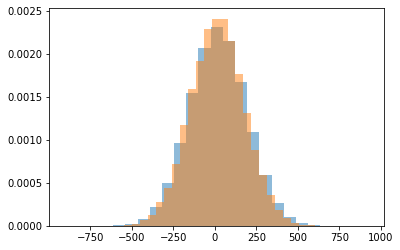

In [7]:
plt.hist(population_men, alpha = 0.5, bins=25, density=True);
plt.hist(population_women, alpha = 0.5, bins=25, density=True);

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [8]:
round(((2.241 * 150) / 50) ** 2)

45

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [9]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [10]:
oddsratio, pvalue = stats.fisher_exact([[10, 15], [39, 34]]) 

pvalue

0.35417955365927367

Нулевая гипотеза - эффект случайный, т. е. маг не умеет предсказывать погоду. 
Т. к. p-value > 𝛼, то у нас нет оснований отвергнуть нулевую гипотезу, а значит, маг действительно **не умеет предсказывать погоду**.

Используем также критерий хи квадрат:

In [11]:
stat, p, dof, expected = stats.chi2_contingency([[10, 15], [39, 34]])
p

0.35396880166541644

Полученное значение p меньше 𝛼, что подтверждает наше изначальное предположение.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [16]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #h

data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, confidence=0.9))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

Нулевая гипотеза - обе выборки имеют равные средние. 

In [ ]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

stats.ttest_ind(data_1, data_2, equal_var=False)

Получаем очень маленькое p-value, это значит, что данные выборки далеки друг от друга.

In [ ]:
plt.hist(data_1, bins=10, alpha=0.5);
plt.hist(data_2, bins=10, alpha=0.5);

Наглядно видно, что два выборки имеют разные средние и с большой долей вероятности не принадлежат одному множеству.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Если принять уровень значимости за 0.05, то т. к. p-value < 𝛼, то у нас есть основания отвергнуть нулевую гипотезу о том, что распределение нормальное. Значит, распределение НЕ нормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

stats.ttest_ind(data_1, data_2, equal_var=False)

 Нулевая гипотеза - наблюдаемые различия случайны, т. е. тот или иной препарат более эффективного лечения не даёт.
 Т. к. полученное значение p-value очень мало (намного меньше 0.05), то у нас есть основания предполагать, что наблюдаемая разница в выборках носит не случайный характер, а значит, мы отвергаем нулевую гипотезу и принимаем альтернативную - что есть значимое различие эффективности препаратов А и В.

In [ ]:
plt.hist(A, bins=20, alpha=0.5);
plt.hist(B, bins=20, alpha=0.5);
plt.legend(['A', 'B']);

Наглядно также видно разницу в множествах А и B.